In [ ]:
# 치킨집이 가장 많은 지역 찾기
# 그림의 크기로 지역을 표현

In [ ]:
# 치킨집 데이터 구하기
# www.localdata.kr

In [1]:
# 데이터 읽어오기
library("readxl")

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
ck <- read_excel("치킨집_가공.xlsx")

In [3]:
head(ck)

소재지전체주소,사업장명
서울특별시 서대문구 창천동 52-20번지 2층,쪼리375
서울특별시 서대문구 창천동 53-83번지 (지상1층),고향
서울특별시 서대문구 창천동 53-3번지 2층,"찬수씨, 싼술을부탁해"
서울특별시 서대문구 남가좌동 377번지 삼성아파트 상가동 101호,케리홈치킨
서울특별시 서대문구 연희동 134-28번지 지하1층,연희38애비뉴
서울특별시 서대문구 창천동 62-53번지 1층 일부,닭꼬치야


In [4]:
# 동별로 추출해서 상세주소는 제거 substr()를 사용하여 동까지만 남기고 나머지 삭제
addr <- substr(ck$'소재지전체주소', 11, 16)

In [5]:
head(addr)

[1] " 창천동 5"  " 창천동 5"  " 창천동 5"  " 남가좌동 " " 연희동 1" 
[6] " 창천동 6"

In [6]:
# 숫자들과 공백을 모두 삭제
# gsub() 함수를 사용하여 제거

addr_num <- gsub("[0-9]","",addr) # gsub(찾을값, 바꿀값, 어디에)

head(addr_num)

[1] " 창천동 "   " 창천동 "   " 창천동 "   " 남가좌동 " " 연희동 "  
[6] " 창천동 "

In [9]:
# 여백 모두 삭제
# gsub() 함수를 사용하여 제거

addr_trim <- gsub(" ","",addr_num)

head(addr_trim)

[1] "창천동"   "창천동"   "창천동"   "남가좌동" "연희동"   "창천동"

In [11]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [14]:
# 동별 업소 개수 확인하기
# 변수의 개수 확인을 위해 table()함수 사용

addr_count <- addr_trim  %>% table() %>% data.frame()

head(addr_count)

.,Freq
남가좌동,282
냉천동,24
대신동,3
대현동,69
미근동,6
북가좌동,155


In [16]:
addr_count

.,Freq
남가좌동,282
냉천동,24
대신동,3
대현동,69
미근동,6
북가좌동,155
북아현동,45
신촌동,2
연희동,104
영천동,15


In [18]:
install.packages("treemap")

Installing package into 'C:/Users/samsung/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'gridBase', 'igraph'



package 'gridBase' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'treemap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samsung\AppData\Local\Temp\Rtmp0YUTZD\downloaded_packages


In [19]:
library(treemap)

Warning message:
"package 'treemap' was built under R version 3.6.3"

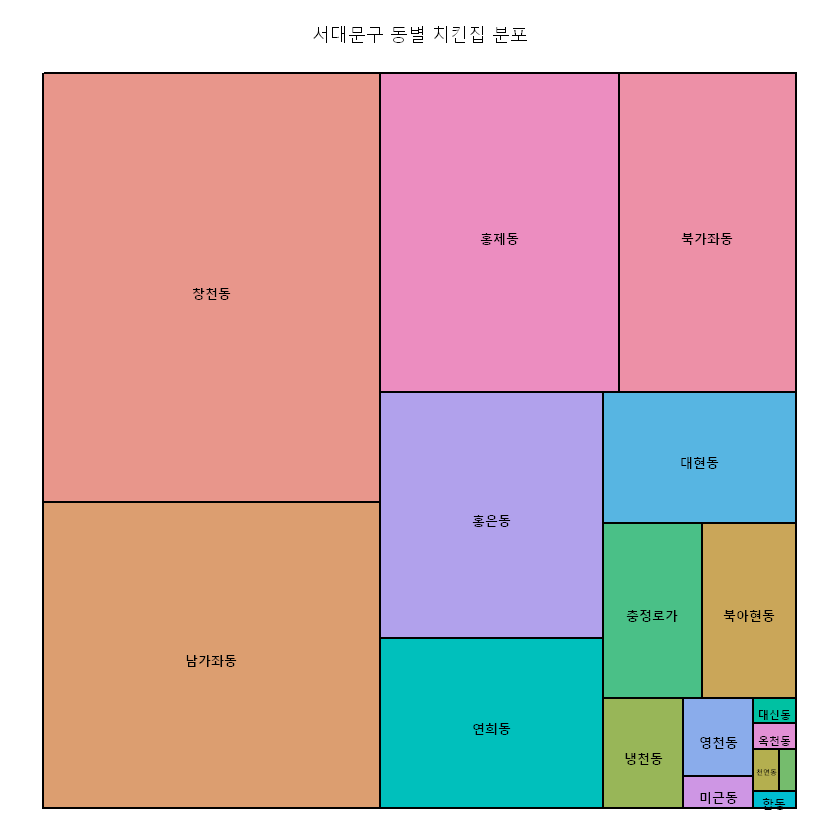

In [21]:
treemap(addr_count, index = ".", vSize = "Freq", title = "서대문구 동별 치킨집 분포")

In [22]:
############################################################################################################################

In [23]:
# 서울시의 구 중에서 성북구와 중구의 미세먼지 비교 및 차이 검정... t검정

In [25]:
dust <- read_excel("dustdata.xlsx")

head(dust)

yyyymmdd,area,finedust
전체,평균,38
2017-12-31,평균,63
2017-12-31,종로구,54
2017-12-31,중구,53
2017-12-31,용산구,60
2017-12-31,성동구,62


In [26]:
str(dust)

dim(dust)

Classes 'tbl_df', 'tbl' and 'data.frame':	3173 obs. of  3 variables:
 $ yyyymmdd: chr  "전체" "2017-12-31" "2017-12-31" "2017-12-31" ...
 $ area    : chr  "평균" "평균" "종로구" "중구" ...
 $ finedust: num  38 63 54 53 60 62 63 69 67 60 ...


[1] 3173    3

In [28]:
# 성북구와 중구 데이터만 추출

dust_anal <- dust %>% filter(area %in% c("성북구", "중구"))

head(dust_anal)

yyyymmdd,area,finedust
2017-12-31,중구,53
2017-12-31,성북구,60
2017-12-30,중구,112
2017-12-30,성북구,128
2017-12-29,중구,81
2017-12-29,성북구,95


In [33]:
# 데이터 현황 구체적인 파악

# 데이터 날짜 확인 -> 2017년 9월 1일 부터 12월 31일까지...

count(dust_anal, yyyymmdd) %>%  arrange(desc(n)) # 모든 데이터가 2개 확인.

count(dust_anal, area)

# 실행 결과를 보면 빠진 데이터가 없이 동일한 날짜는 2개씩 구에 따른 미세먼지 수치는 122개씩 모두 포함되어 있음을 알 수 있다.

yyyymmdd,n
2017-09-01,2
2017-09-02,2
2017-09-03,2
2017-09-04,2
2017-09-05,2
2017-09-06,2
2017-09-07,2
2017-09-08,2
2017-09-09,2
2017-09-10,2


area,n
성북구,122
중구,122


In [37]:
# 성북구와 중구에 데이터를 각각 분리

dust_sb <- subset(dust_anal, area == "성북구")
dust_jg <- subset(dust_anal, area == "중구")
# sub(데이터, 조건)
# dust_sb <- dust_anal %>% filter(area == "성북구")
# dust_jg <- dust_anal %>% filter(area == "중구")
dust_sb
dust_jg

yyyymmdd,area,finedust
2017-12-31,성북구,60
2017-12-30,성북구,128
2017-12-29,성북구,95
2017-12-28,성북구,47
2017-12-27,성북구,27
2017-12-26,성북구,27
2017-12-25,성북구,29
2017-12-24,성북구,79
2017-12-23,성북구,116
2017-12-22,성북구,63


yyyymmdd,area,finedust
2017-12-31,중구,53
2017-12-30,중구,112
2017-12-29,중구,81
2017-12-28,중구,35
2017-12-27,중구,23
2017-12-26,중구,22
2017-12-25,중구,23
2017-12-24,중구,69
2017-12-23,중구,99
2017-12-22,중구,55


In [39]:
install.packages("psych")
library(psych)

Installing package into 'C:/Users/samsung/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'tmvnsim', 'mnormt'



package 'tmvnsim' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samsung\AppData\Local\Temp\Rtmp0YUTZD\downloaded_packages


Warning message:
"package 'psych' was built under R version 3.6.3"

In [40]:
# 분리한 두 개구의 데이터를 이용해서 기초 통계량을 도출 describe()

describe(dust_sb$finedust)

describe(dust_jg$finedust)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,122,42.7459,20.13736,39.5,40.33673,17.0499,9,128,119,1.405036,2.932981,1.823151


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,122,35.90984,17.43607,33.5,34.12245,15.5673,8,112,104,1.328124,2.882259,1.578588


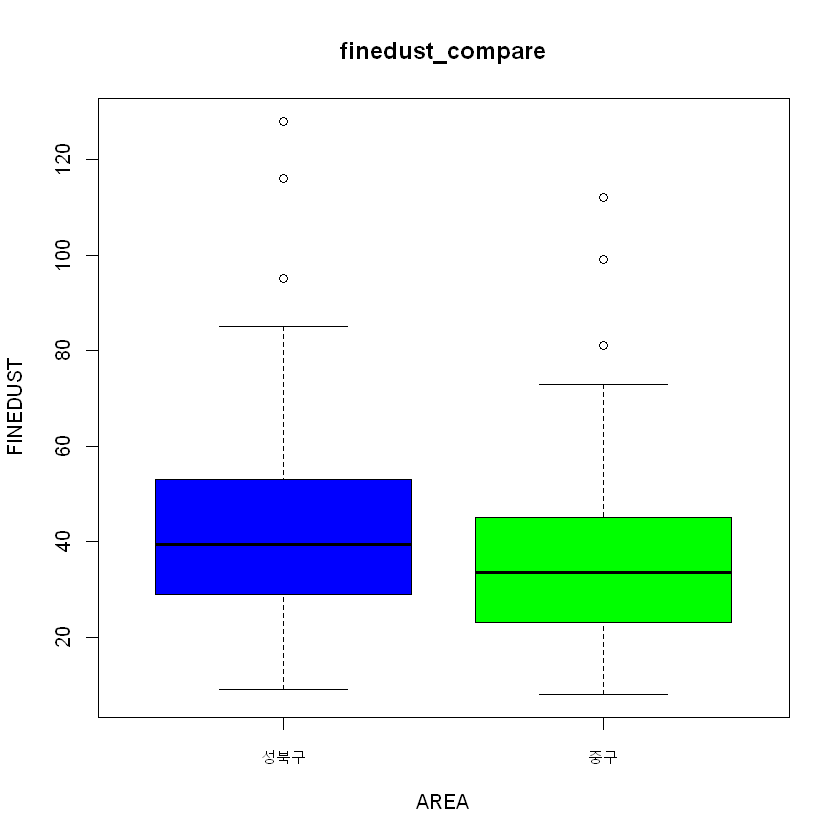

In [44]:
# 성북구와 중구의 미세먼지 분포확인 boxplot()

boxplot(dust_sb$finedust, dust_jg$finedust, main = "finedust_compare", xlab="AREA", names=c("성북구", "중구"),
        ylab="FINEDUST", col=c("blue","green"))

In [45]:
t.test(data = dust_anal, finedust ~ area , var.qual = T)

# 결과
# p=value = 0.004983 으로 0.05보다 작다. 따라서 귀무가설 
# (성북구와 중구의 미세먼지 평균은 차이가 나지 않는다)를 기각한다.
# 차이가 있다는 대립가설을 채택한다.


	Welch Two Sample t-test

data:  finedust by area
t = 2.8347, df = 237.15, p-value = 0.004983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.085169 11.586962
sample estimates:
mean in group 성북구   mean in group 중구 
            42.74590             35.90984 
